# Linear regression using NumPy

Consider a quadratic function of form as below

<h2>
\begin{equation}
y = 5x^3 + 3.5x^2 + 1.8x + 7.3
\end{equation}
</h2>

We will do following steps in estimating y:
1. create sample data for y, given random numbers of x
1. initalize the coefficients with random values
1. loop in data points created in step 1
4. calculate loss, update coefficients
5. repeat until loss ~ 0

In [126]:
# imports

import numpy as np
from matplotlib import pyplot as plt

np.random.seed(13)

In [1124]:
def quadratic_equation(x, a=None, b=None, c=None, d=None):
    if a or b or c or d:
        return a * x**3 + b * x**2 + c * x + d
    return 5 * x**3 + 3.5 * x**2 + 1.8 * x + 7.3

In [1125]:
x = np.linspace(-5, 5, num=30)  # create 100 random points for x
y = np.apply_along_axis(quadratic_equation, 0, x)  # get y values for a given x value

x.shape, y.shape

((30,), (30,))

## Plot equation

In [1147]:
def plot_equation(x, y, noise=None, curve=True, title=None):
    if noise is not None:
        y = np.add(y, noise)
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlim(-7, 7)
    ax.set_ylim(-400, 600)
    if curve:
        x_ = np.linspace(x.min(), x.max(), num=500)
        y_ = quadratic_equation(x_)
    ax.plot(x_, y_, c="r")
    plt.show()

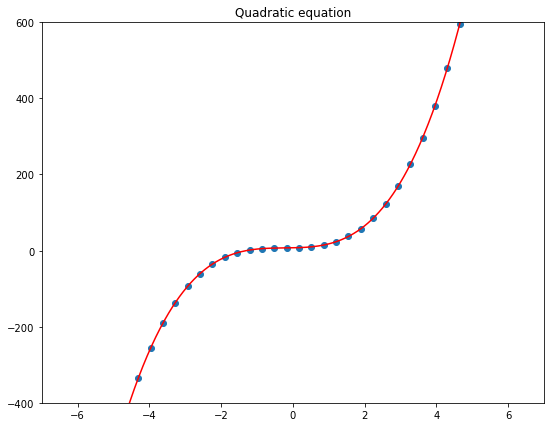

In [1148]:
plot_equation(x, y, title="Quadratic equation")

<p>
As we can see, the above equation is perfect quadratic, which is not possible in any real world scenarios. There is always an unexplained error in any Machine learning model, which can be due to inadequate data collection (or) less features considered etc.,
<hr>
So, lets add some noise to the above dataset and try to fit a linear regression curve
</p>

## New plot of equation after adding noise

In [1149]:
noise = np.random.normal(scale=30., size=30)
noise.shape

(30,)

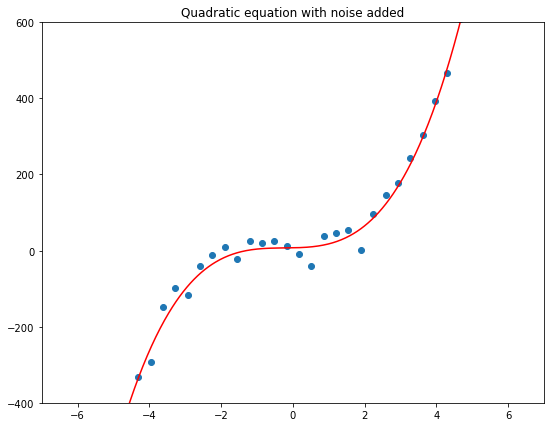

In [1150]:
plot_equation(x, y, noise=noise, title="Quadratic equation with noise added")
x_ = np.linspace(-5, 5, 500)
y_ = quadratic_equation(x_)
ax.plot(x_, y_, c= 'r')
plt.show()

## Estimating equation
<br>
We can rewrite the equation above with coefficients
<h2>
\begin{equation}
y = ax^3 + bx^2 + cx + d
\end{equation}
    <br>

\begin{equation}
loss, L = (y - y')^2
\end{equation}
</h2>

Derivate of loss with respect to each coefficient<br>
<h3>
\begin{equation}
dL/da = 2(y-y') * (-x^3)
\end{equation}
    
\begin{equation}
dL/db = 2(y-y') * (-x^2)
\end{equation}

\begin{equation}
dL/dc = 2(y-y') * (-x)
\end{equation}
    
\begin{equation}
dL/dd = 2(y-y')* (-1)
\end{equation}
</h3>

In [1151]:
def calc_loss(y, y_hat):
    return np.mean(np.square(y - y_hat))

a: -0.91; b: -1.16; c: -0.65; d: -0.51


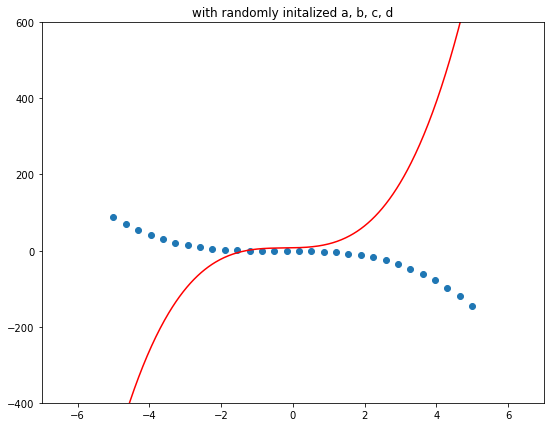

In [1152]:
# initialize values

a, b, c, d = np.random.randn(4)
print(f"a: {a:.2f}; b: {b:.2f}; c: {c:.2f}; d: {d:.2f}")

# let's store newly calculated target values created using randomly initialized a, b, c, d in y_hat
y_hat = np.apply_along_axis(quadratic_equation, 0, x, a=a, b=b, c=c, d=d)
plot_equation(x, y_hat, title="with randomly initalized a, b, c, d")

actual: a: 5;b: 3.5; c: 1.8; d: 7.3
a: -1.08; b: -1.14; c: 1.16; d: 0.49
step: 1; loss: 105005.50937756251


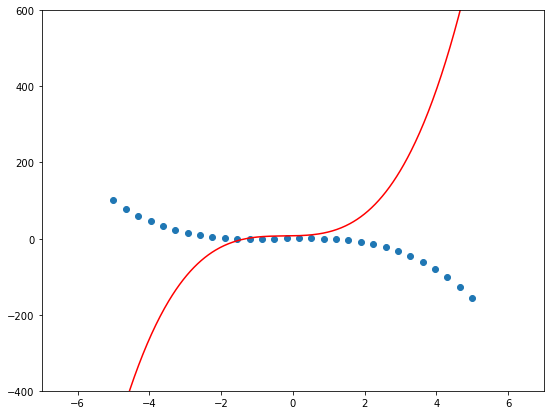

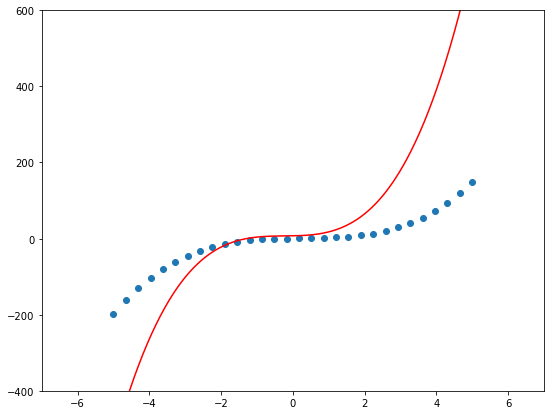

step: 11; loss: 36549.42488337795


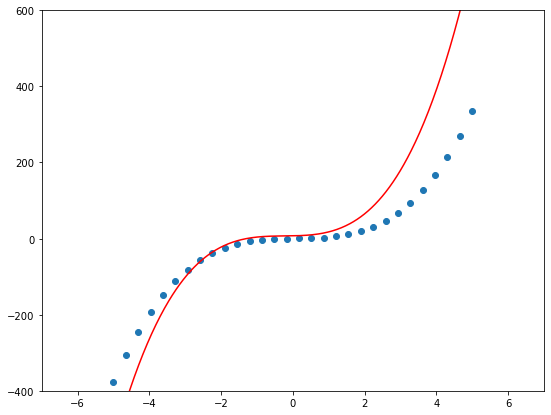

step: 21; loss: 14077.137530142722


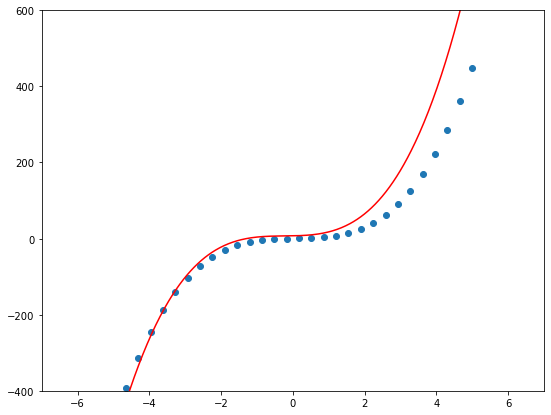

step: 31; loss: 6622.509948434678


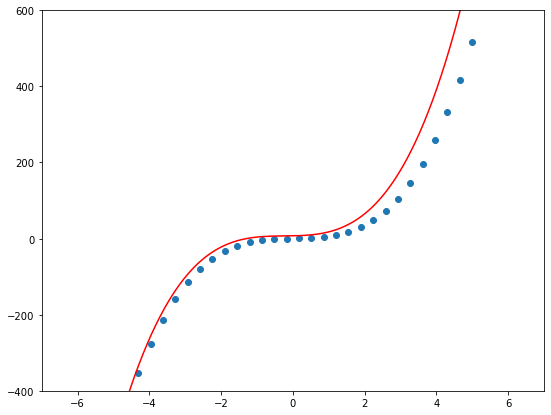

step: 41; loss: 4076.774538278613


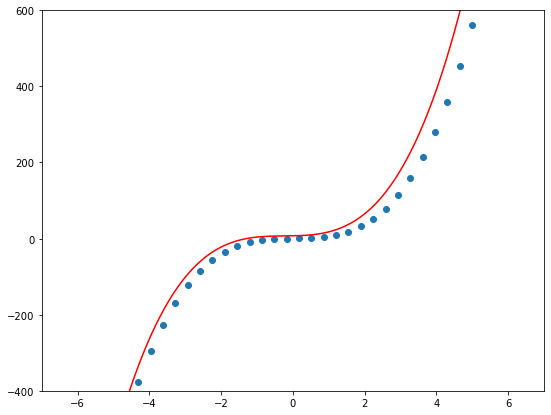

step: 51; loss: 3139.7241213897146


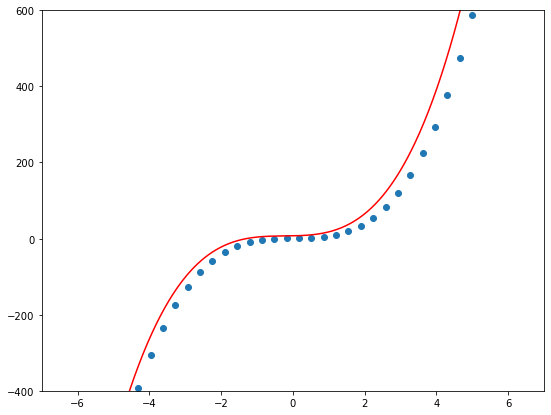

step: 61; loss: 2733.7124948085498


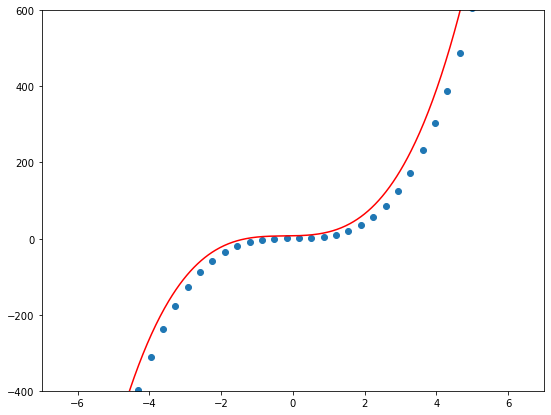

step: 71; loss: 2506.630665057497


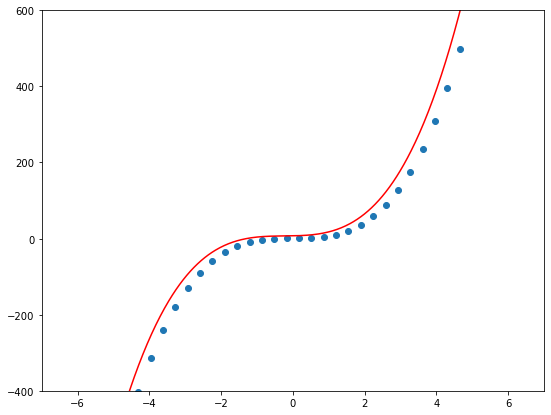

step: 81; loss: 2343.22745891619


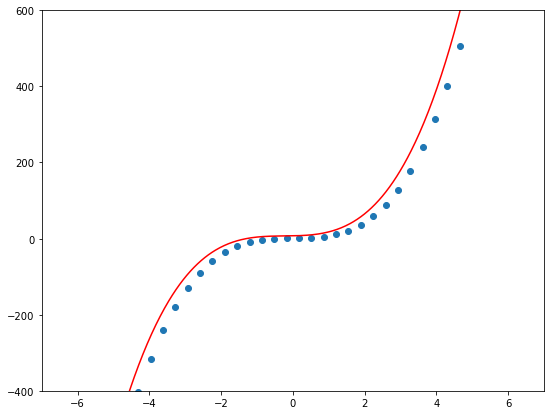

step: 91; loss: 2205.5873076909143


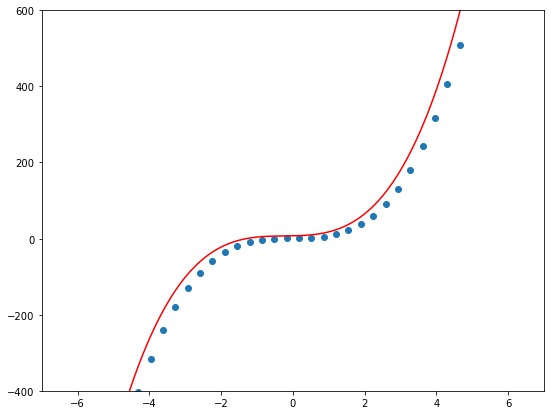

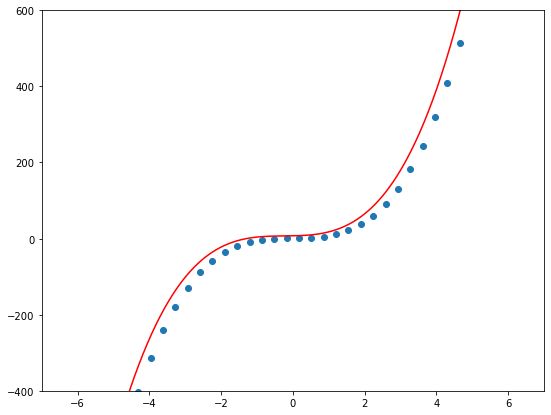

a: 4.99; b: 0.12; c: 1.48; d: 0.58


In [1223]:
print(f"actual: a: {5};b: {3.5}; c: {1.8}; d: {7.3}")
a, b, c, d = np.random.randn(4)
print(f"a: {a:.2f}; b: {b:.2f}; c: {c:.2f}; d: {d:.2f}")
iterations = 100
learning_rate = 0.00001

for step in range(iterations):
    y_hat = np.apply_along_axis(quadratic_equation, 0, x, a=a, b=b, c=c, d=d)
    diff_y = np.subtract(y_hat, y)
    da = np.sum((np.power(x, 3)).dot((2 * diff_y))) / 30
    db = np.sum((np.power(x, 2)).dot((2 * diff_y))) / 30
    dc = np.sum((1 * x) * (2 * diff_y)) / 30
    dd = np.sum(1 * (2 * diff_y)) / 30
    # adjust gradients
    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc
    d -= learning_rate * dd
    if step % 10 == 0:
        print(f"step: {step+1}; loss: {calc_loss(y, y_hat)}")
    if step % 9 == 0:
        plot_equation(x, y_hat, curve=True)
print(f"a: {a:.2f}; b: {b:.2f}; c: {c:.2f}; d: {d:.2f}")

In [1139]:
def calc_loss(y, **params):
    y_hat = torch.zeros(30)
    for enum, i in enumerate(x):
        y_hat[enum] = quadratic_equation(i, a=a, b=b, c=c, d=d)
    return torch.mean(torch.square(torch.tensor(y) - y_hat))

In [1144]:
a, b, c, d = torch.randn(4)
learning_rate = 0.00001
[_.requires_grad_() for _ in [a, b, c, d]]
print(a, b, c, d)
for i in range(10000):
    loss = calc_loss(y, **{"a": a, "b": b, "c": c, "d": d})
#     [_.retain_grad() for _ in [a, b, c, d]]
    loss.backward()
    with torch.no_grad():
        a -= a.grad*learning_rate
        b -= b.grad*learning_rate
        c -= c.grad*learning_rate
        d -= d.grad*learning_rate
    if i % 1000 == 0:
        print(f"step: {i}; loss: {loss}")
a, b, c, d

tensor(-0.3504, requires_grad=True) tensor(0.6350, requires_grad=True) tensor(-0.6910, requires_grad=True) tensor(1.3096, requires_grad=True)
step: 0; loss: 83075.34963695325
step: 1000; loss: 1992.7937718811781
step: 2000; loss: 78065.14772545913
step: 3000; loss: 18209.605853635658
step: 4000; loss: 52466.570317542915
step: 5000; loss: 48480.33797395862
step: 6000; loss: 21024.168434346313
step: 7000; loss: 75172.3649133488
step: 8000; loss: 1840.7796669798538
step: 9000; loss: 82672.84784003177


(tensor(3.4481, requires_grad=True),
 tensor(2.1396, requires_grad=True),
 tensor(3.8324, requires_grad=True),
 tensor(7.8827, requires_grad=True))

In [897]:
a.grad, b.grad, c.grad, d.grad

(tensor(-9790.4609), tensor(-1095.1246), tensor(-519.8541), tensor(-75.6662))